In [1]:
# Versão Python utilizada
from platform import python_version
print('Versão da Linguagem Python utilizada neste Jupyter Notebook:', python_version())

Versão da Linguagem Python utilizada neste Jupyter Notebook: 3.9.12


In [2]:
# Instalando pacotes

# !pip install -q -U watermark

## _Imports_

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [5]:
# Versões dos pacotes usados
%reload_ext watermark
%watermark -a "Sandro Luiz Mazzolla Junior" --iversions

Author: Sandro Luiz Mazzolla Junior

numpy     : 1.21.5
pandas    : 1.4.2
matplotlib: 3.5.1
seaborn   : 0.11.2



## Instalando às versões utilizadas neste pacote

!pip install nome_pacote = versão_pacote

__Exemplo__

!pip install pandas = 1.4.2

## _Carregando Dataset_

In [6]:
df = pd.read_csv('dados/dataset.csv')

In [7]:
# Formato do Dataset em linhas , colunas
df.shape

(11000, 12)

In [8]:
# Informações sobre colunas do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [9]:
# Mostrando os cinco primeiros itens do Dataset
df.head(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [10]:
# Amostra(5) do Dataset
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
2051,2052,F,Aviao,4,5,221,3,baixa,F,43,3561,1
4382,4383,A,Aviao,2,2,204,4,alta,M,5,5382,0
6025,6026,F,Aviao,5,3,267,5,baixa,M,6,1119,1
4290,4291,D,Navio,4,4,211,4,media,M,8,4747,1
205,206,F,Navio,2,3,145,3,media,F,24,7588,1


In [11]:
# Mostrando os cinco últimos itens do Dataset
df.tail(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


### Separando Variáveis Categóricas e Numéricas

In [12]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [13]:
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [14]:
# Lista de colunas categóricas
categoricas = ['corredor_armazem',
               'modo_envio',
               'prioridade_produto',
               'genero']

In [15]:
# Lista de colunas numéricas
numericas = ['numero_chamadas_cliente',
             'avaliacao_cliente',
             'custo_produto',
             'compras_anteriores',
             'desconto',
             'peso_gramas']

# ID não possui nenhuma informação útil

In [16]:
# Contando valores únicos (cada categoria) da variável alvo

# 1 classe positiva, entrega dentro do prazo
# 0 classe negativa, entrega fora do prazo
df['entregue_no_prazo'].value_counts()

1    6563
0    4437
Name: entregue_no_prazo, dtype: int64

In [17]:
# Variável alvo, estudo será feito com base nesta variável
target = ['entregue_no_prazo']

### Explorando as Variáveis Numéricas

In [18]:
# Resumo das Variáveis Numéricas
df[numericas].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Observações:

1. As colunas `numero_chamadas_cliente`, `avaliacao_cliente` e `custo_produto` parecem ter uma distribuição bastante simétrica (média(mean) e mediana(50%) não são muito diferentes).

2. As colunas `compras_anteriores` e `desconto` parecem estar inclinadas para a direita (Média(mean) maior do que a Mediana(50%)).

3. A coluna `peso_gramas` parece estar mais inclinada para a esquerda (Média(mean) menor do que a Mediana(50%)).

<AxesSubplot:>

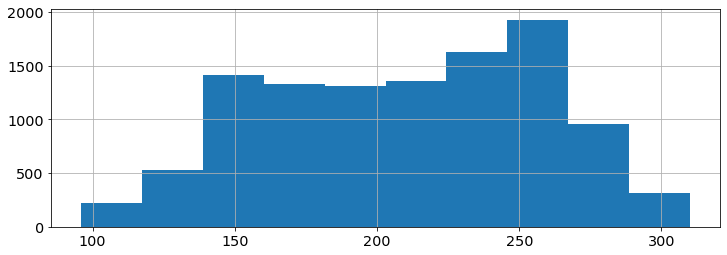

In [19]:
# Criando um histograma da variável custo_produto
df['custo_produto'].hist()

<AxesSubplot:>

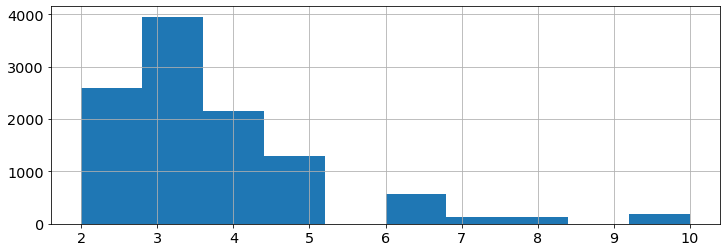

In [20]:
# Criando um histograma da variável compras_anteriores
df['compras_anteriores'].hist()